#### 1. Multilayer Perceptron (MLP)

In [2]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Step 2: Load the Dataset
# Load the scaled dataset
data = pd.read_csv('scaled_dataset.csv')
data.head()

,Age,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,Check-in Service,Boarding Service,Layover Service,Onboard Services,Baggage Service,...,Call Center Service,Departure Delay,Total Delay,Arrival Delay_log,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Leisure,Satisfaction_Satisfied
0,1.313639,0.707066,-0.725397,-0.707346,-1.415134,0.710901,-0.724658,1.419690,-0.713449,1.426085,...,-0.000036,-0.512062,-0.535057,0.000000,False,False,False,False,False,True
1,0.375815,1.410824,-1.432411,-0.000954,-0.000071,0.007665,-1.432021,0.007274,-0.004924,1.426085,...,-1.419386,0.655089,0.152076,1.386294,False,False,False,False,False,True
2,0.303675,0.003308,-1.432411,-1.413738,0.707461,0.710901,-0.017295,0.007274,-0.004924,1.426085,...,1.419315,-0.512062,-0.535057,0.000000,True,False,False,True,False,True
3,-0.057027,1.410824,-1.432411,-0.707346,1.414992,-1.398805,0.690068,-0.698934,-0.713449,0.718877,...,1.419315,-0.512062,-0.535057,0.000000,False,False,False,False,False,True
4,0.952937,1.410824,-0.018382,-1.413738,1.414992,-0.695570,0.690068,1.419690,-1.421974,-0.695539,...,-0.709711,-0.512062,-0.535057,0.000000,True,False,False,False,False,True


In [4]:
# Separate features and target
X = data.drop('Satisfaction_Satisfied', axis=1) 
y = data['Satisfaction_Satisfied']  

In [5]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# Step 4: Define the MLP Model Architecture
model = Sequential([  # Create a sequential model (a linear stack of layers)
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 128 neurons, ReLU activation, input shape matches number of features
    Dropout(0.3),  # Dropout layer to reduce overfitting by randomly setting 30% of inputs to zero
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons and ReLU activation
    Dropout(0.3),  # Another dropout layer with 30% rate for regularization
    Dense(32, activation='relu'),  # Third hidden layer with 32 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

In [8]:
# Step 5: Compile the Model
model.compile(
    optimizer='adam',              # Use Adam optimizer, which combines the advantages of RMSProp and SGD
    loss='binary_crossentropy',    # Use binary cross-entropy loss for binary classification tasks
    metrics=['accuracy']           # Evaluate the model using accuracy metric during training and testing
)

In [9]:
# Step 6: Train the Model
history = model.fit(
    X_train,               # Training features
    y_train,               # Training labels
    epochs=100,            # Train the model for 100 epochs (iterations over the entire dataset)
    batch_size=32,         # Number of samples per gradient update
    validation_split=0.2,  # Use 20% of the training data for validation to monitor overfitting
    verbose=1              # Verbosity mode (1 = progress bar shown during training)
)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7552 - loss: 0.5386 - val_accuracy: 0.8322 - val_loss: 0.4081
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4225 - val_accuracy: 0.8356 - val_loss: 0.4003
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8244 - loss: 0.4063 - val_accuracy: 0.8338 - val_loss: 0.3972
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.4012 - val_accuracy: 0.8375 - val_loss: 0.4026
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8311 - loss: 0.4016 - val_accuracy: 0.8375 - val_loss: 0.3973
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8350 - loss: 0.3887 - val_accuracy: 0.8378 - val_loss: 0.3953
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.3969 - val_accuracy: 0.8381 - val_loss: 0.3930
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0.3918 - val_accu

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


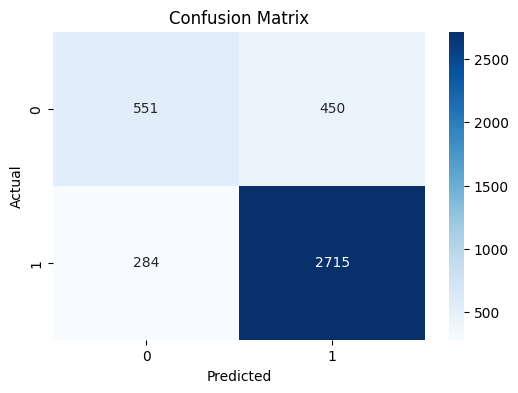

              precision    recall  f1-score   support

       False       0.66      0.55      0.60      1001
        True       0.86      0.91      0.88      2999

    accuracy                           0.82      4000
   macro avg       0.76      0.73      0.74      4000
weighted avg       0.81      0.82      0.81      4000



In [10]:
# Step 7: Evaluate the Model

# Predict on test set
y_pred_prob = model.predict(X_test)  # Generate predicted probabilities for the test set
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions using 0.5 threshold

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix to evaluate prediction accuracy
plt.figure(figsize=(6, 4))  # Set figure size for the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Plot the confusion matrix with annotations
plt.xlabel("Predicted")  # Label for x-axis
plt.ylabel("Actual")     # Label for y-axis
plt.title("Confusion Matrix")  # Title of the plot
plt.show()  # Display the plot

# Classification Report
print(classification_report(y_test, y_pred))  # Print precision, recall, f1-score, and accuracy metrics


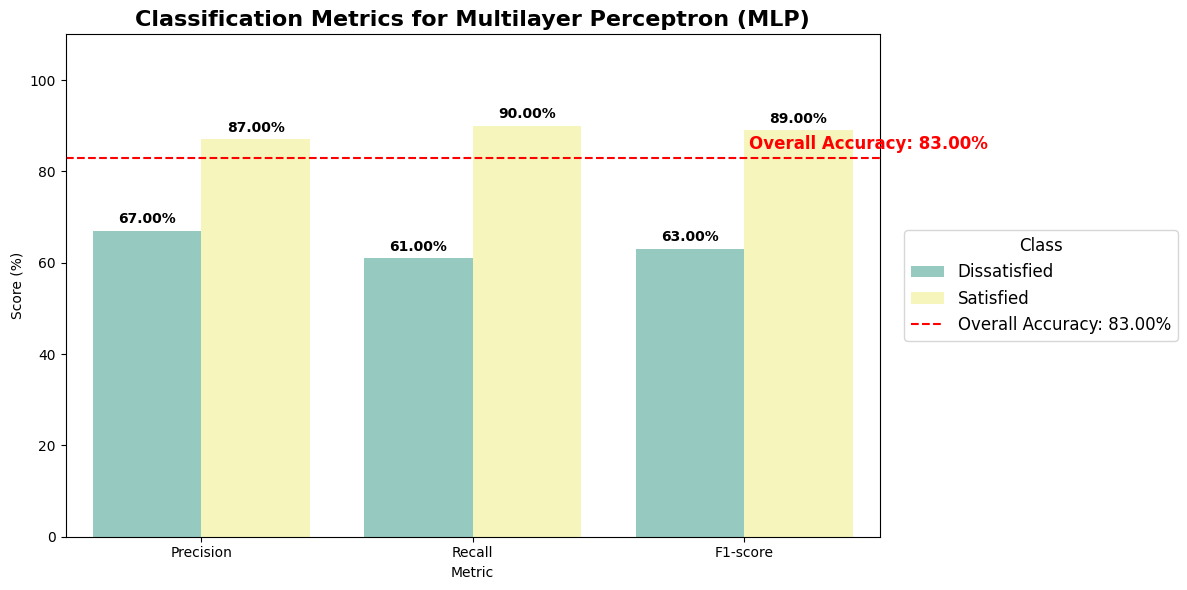

In [11]:
# Import required libraries for visualization and data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Raw metrics with updated class names
metrics = {
    'Class': ['Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied'],  # Class labels
    'Metric': ['Precision', 'Recall', 'F1-score'] * 2,  # Corresponding metric types for each class
    'Score': [0.67, 0.61, 0.63, 0.87, 0.90, 0.89]  # Raw scores (from classification report or evaluation)
}

# Overall accuracy
accuracy = 0.83  # Model accuracy
accuracy_percent = accuracy * 100  # Convert accuracy to percentage
accuracy_label = f'Overall Accuracy: {accuracy_percent:.2f}%'  # Format label for the accuracy line

# Create DataFrame from the metrics dictionary
class_metrics = pd.DataFrame(metrics)
class_metrics['Score'] = class_metrics['Score'] * 100  # Convert scores to percentages for plotting

# Plot
plt.figure(figsize=(12, 6))  # Set figure size
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')  # Barplot with class-based coloring

# Add score labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2  # Center of the bar
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')  # Annotate bar

# Add a horizontal line for overall accuracy
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)  # Red dashed line
plt.text(
    x=2.9, y=accuracy_percent + 2,  # Position for text label
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Final plot settings
plt.ylim(0, 110)  # Y-axis limit to make space for labels above bars
plt.title('Classification Metrics for Multilayer Perceptron (MLP)', fontsize=16, fontweight='bold')  # Plot title
plt.ylabel('Score (%)')  # Y-axis label
plt.xlabel('Metric')  # X-axis label

# Move legend outside the plot
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, title_fontsize=12, frameon=True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

#### Model Training Progress (Accuracy & Loss)

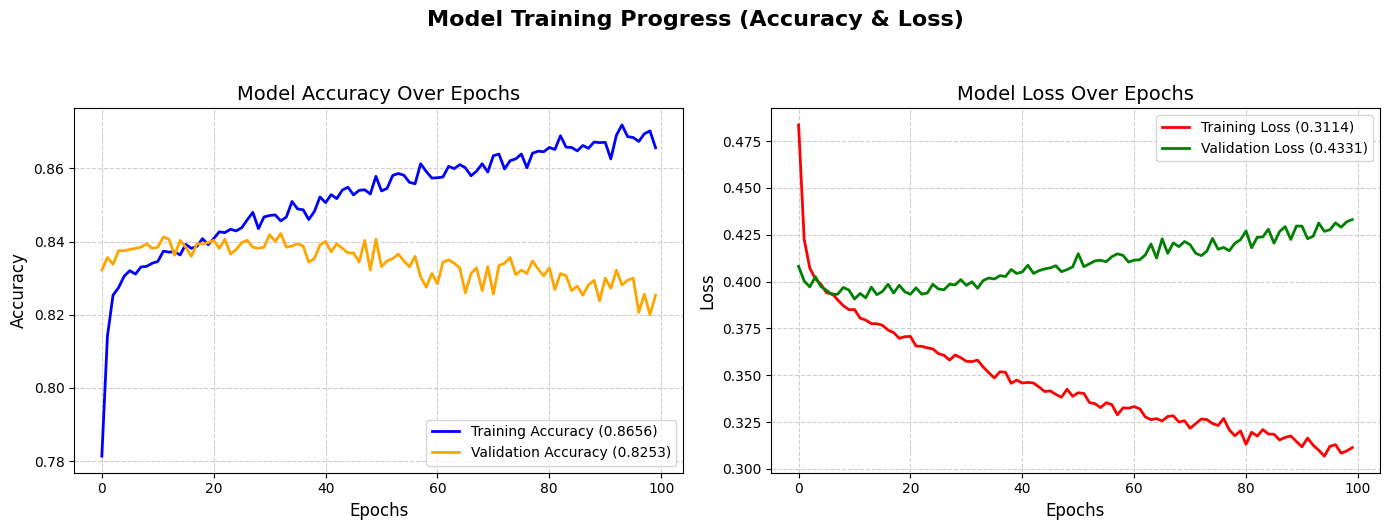

In [12]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot with improved styling
plt.figure(figsize=(14, 5))  # Set the figure size (width x height in inches)

# Adding a common title across subplots
plt.suptitle('Model Training Progress (Accuracy & Loss)', fontsize=16, y=1.05, fontweight='bold')  # Main title

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)  # First subplot: 1 row, 2 columns, position 1
plt.plot(
    history.history['accuracy'],
    label=f'Training Accuracy ({history.history["accuracy"][-1]:.4f})',
    color='blue',
    linewidth=2
)  # Plot training accuracy with latest value in label
plt.plot(
    history.history['val_accuracy'],
    label=f'Validation Accuracy ({history.history["val_accuracy"][-1]:.4f})',
    color='orange',
    linewidth=2
)  # Plot validation accuracy with latest value in label
plt.xlabel('Epochs', fontsize=12)  # Label for x-axis
plt.ylabel('Accuracy', fontsize=12)  # Label for y-axis
plt.title('Model Accuracy Over Epochs', fontsize=14)  # Title for the subplot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a styled grid
plt.legend(loc='lower right', fontsize=10)  # Add legend in the bottom right corner

# --- Loss Plot ---
plt.subplot(1, 2, 2)  # Second subplot: position 2
plt.plot(
    history.history['loss'],
    label=f'Training Loss ({history.history["loss"][-1]:.4f})',
    color='red',
    linewidth=2
)  # Plot training loss with final value in label
plt.plot(
    history.history['val_loss'],
    label=f'Validation Loss ({history.history["val_loss"][-1]:.4f})',
    color='green',
    linewidth=2
)  # Plot validation loss with final value in label
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss Over Epochs', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)

# Adjust subplot spacing to prevent overlap and show the plot
plt.tight_layout()  # Auto-adjusts spacing between subplots
plt.show()  # Display the combined plot

#### MLP + Hyperparameter Tuning with Keras Tuner

In [155]:
# Step 1: Install Keras Tuner (if not already installed)
# pip install keras-tuner

In [16]:
# Step 2: Import Required Libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting dataset into train/test sets
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation metrics
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # High-level API for building neural networks
from tensorflow.keras import layers  # Common layers for MLP and other models
import keras_tuner as kt  # For hyperparameter tuning of Keras models

In [17]:
data = pd.read_csv("scaled_dataset.csv")                    # Load the preprocessed and scaled dataset
X = data.drop("Satisfaction_Satisfied", axis=1)             # Separate features by dropping the target column
y = data["Satisfaction_Satisfied"]                          # Assign the target column to y
X_train, X_test, y_train, y_test = train_test_split(        # Split data into training and testing sets
    X, y,                                                   # Features and target
    test_size=0.2,                                          # 20% of the data goes to the test set
    random_state=42,                                        # For reproducibility
    stratify=y                                              # Maintain class distribution in train/test sets
    )

In [18]:
# Step 4: Build a Hypermodel Function
def build_model(hp):
    model = keras.Sequential()                                                   # Initialize a Sequential model
    model.add(layers.Input(shape=(X_train.shape[1],)))                           # Input layer matching number of features
    for i in range(hp.Int("num_layers", 1, 3)):                                  # Tune number of hidden layers (1 to 2)
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),  # Tune number of units per layer
                activation=hp.Choice("activation", ["relu", "tanh"])               # Tune activation function
            )
        )
        model.add(
            layers.Dropout(rate=hp.Float("dropout", 0.0, 0.5, step=0.1))           # Tune dropout rate to reduce overfitting
        )
    model.add(layers.Dense(1, activation="sigmoid"))                             # Output layer for binary classification
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")                # Tune learning rate (log scale)
        ),
        loss="binary_crossentropy",                                              # Binary cross-entropy loss for classification
        metrics=["accuracy"]                                                    # Track accuracy during training
    )
    return model                                                                 # Return the compiled model


In [19]:
# Step 5: Initialize Keras Tuner (RandomSearch / Hyperband)
tuner = kt.RandomSearch(
    build_model,                             # The hypermodel function to build and tune
    objective="val_accuracy",                # Optimize for highest validation accuracy
    max_trials=10,                           # Try up to 10 different hyperparameter combinations
    executions_per_trial=1,                  # Run each model configuration once
    directory="mlp_tuning",                  # Folder to save tuning logs/results
    project_name="mlp_classifier"            # Subdirectory name for this specific tuning project
)


Reloading Tuner from mlp_tuning\mlp_classifier\tuner0.json


In [20]:
# Step 6: Run Hyperparameter Search
tuner.search(
    X_train,                      # Training features
    y_train,                      # Training labels
    epochs=100,                   # Maximum number of epochs per trial
    validation_split=0.2,         # Use 20% of training data for validation during tuning
    verbose=1                     # Display training progress (1 = progress bar)
)

In [24]:
# Step 7: Get the Best Model and Evaluate
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output 

best_model = tuner.get_best_models(num_models=1)[0]  # Retrieve the best model from the hyperparameter search

# Predict on the test set and convert probabilities to binary (0 or 1)
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Convert y_test to numpy and flatten both y_test and y_pred for consistent mapping
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.to_numpy().flatten()

# Map binary labels to class names
y_pred_labels = ['Satisfied' if pred == 1 else 'Dissatisfied' for pred in y_pred_flat]
y_test_labels = ['Satisfied' if true == 1 else 'Dissatisfied' for true in y_test_flat]

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test_labels, y_pred_labels))  # Print confusion matrix with class names
print(classification_report(y_test_labels, y_pred_labels))  # Detailed classification metrics with labels


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 625  376]
 [ 284 2715]]
              precision    recall  f1-score   support

Dissatisfied       0.69      0.62      0.65      1001
   Satisfied       0.88      0.91      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.76      0.77      4000
weighted avg       0.83      0.83      0.83      4000



#### Visualize Confusion Matrix

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 625  376]
 [ 284 2715]]
              precision    recall  f1-score   support

Dissatisfied       0.69      0.62      0.65      1001
   Satisfied       0.88      0.91      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.76      0.77      4000
weighted avg       0.83      0.83      0.83      4000



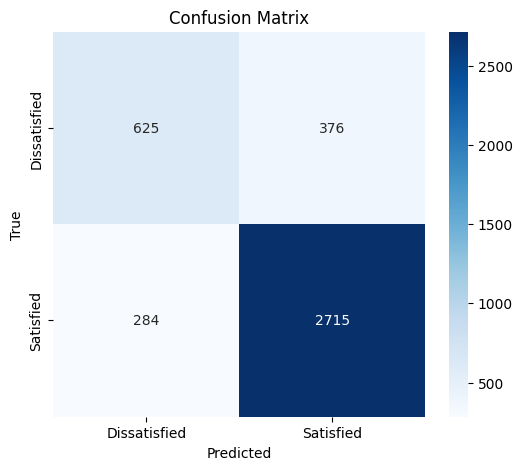

In [26]:
import seaborn as sns  # For visualization (heatmap)
import matplotlib.pyplot as plt  # For plotting
from sklearn.metrics import confusion_matrix, classification_report  # For evaluation metrics

# Step 7: Get the Best Model and Evaluate

best_model = tuner.get_best_models(num_models=1)[0]  # Retrieve the best model from the hyperparameter search

# Predict on the test set and convert probabilities to binary (0 or 1)
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Convert y_test to numpy and flatten both y_test and y_pred for consistent mapping
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.to_numpy().flatten()

# Map binary labels to class names for readability
y_pred_labels = ['Satisfied' if pred == 1 else 'Dissatisfied' for pred in y_pred_flat]
y_test_labels = ['Satisfied' if true == 1 else 'Dissatisfied' for true in y_test_flat]

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)  # Generate confusion matrix

# Print the confusion matrix and classification report
print(conf_matrix)  # Print confusion matrix for evaluation
print(classification_report(y_test_labels, y_pred_labels))  # Print detailed classification metrics (precision, recall, f1-score)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Dissatisfied", "Satisfied"], yticklabels=["Dissatisfied", "Satisfied"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Ploting Classification Report

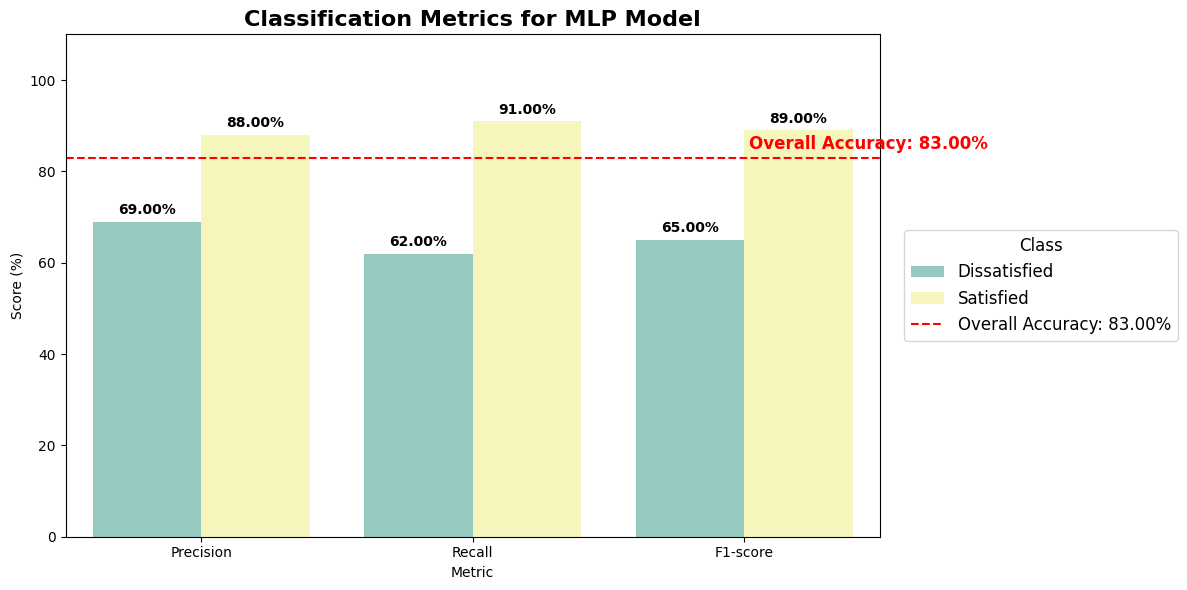

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 8: Plot Classification Metrics

# Given classification report data
metrics = {
    'Class': ['Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied'],
    'Metric': ['Precision', 'Recall', 'F1-score'] * 2,
    'Score': [0.69, 0.62, 0.65, 0.88, 0.91, 0.89]
}

# Overall accuracy
accuracy = 0.83
accuracy_percent = accuracy * 100
accuracy_label = f'Overall Accuracy: {accuracy_percent:.2f}%'

# Create DataFrame from metrics
class_metrics = pd.DataFrame(metrics)
class_metrics['Score'] = class_metrics['Score'] * 100  # Convert scores to percentage

# Plotting
plt.figure(figsize=(12, 6))

# Create a barplot
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')

# Add score labels above bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add accuracy line and label
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Final plot settings
plt.ylim(0, 110)
plt.title('Classification Metrics for MLP Model', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')

# Move legend outside
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, title_fontsize=12, frameon=True)

# Display the plot
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd                                                # Import pandas for DataFrame manipulation

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]                    # Retrieve the best hyperparameters from the tuner

# Extract and round learning_rate
hp_items = []                                                      # Initialize an empty list to store hyperparameter names and values
for k, v in best_hps.values.items():                                # Iterate through each hyperparameter and value
    if k == "learning_rate":                                        # If the hyperparameter is 'learning_rate'
        v = round(v, 5)                                             # Round the learning rate to 5 decimal places
    hp_items.append((k, v))                                          # Append the hyperparameter name and value to the list

# Create formatted DataFrame
hp_table = pd.DataFrame(hp_items, columns=["Hyperparameter", "Value"])  # Create a DataFrame from the list of hyperparameters

# Print formatted table
print("\n🔧 Best Hyperparameters Found:")                             # Display a message before printing the table
print(hp_table.to_markdown(index=False))                             # Print the table in markdown format (without the index)

# Save best model in modern Keras format
best_model = tuner.get_best_models(num_models=1)[0]                 # Retrieve the best model from the tuner
best_model.save("best_model.keras")                                  # Save the best model in the Keras format



🔧 Best Hyperparameters Found:
| Hyperparameter   | Value   |
|:-----------------|:--------|
| num_layers       | 3       |
| units_0          | 224     |
| activation       | tanh    |
| dropout          | 0.4     |
| learning_rate    | 0.0008  |
| units_1          | 160     |
| units_2          | 32      |


#### Implementation with Specified Hyperparameters

In [30]:
import pandas as pd                                                # Import pandas for DataFrame manipulation
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt

# Load the dataset
data = pd.read_csv("scaled_dataset.csv")                             # Load the preprocessed and scaled dataset

X = data.drop("Satisfaction_Satisfied", axis=1)                      # Separate features by dropping the target column
y = data["Satisfaction_Satisfied"]                                   # Assign the target column to y

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build the hypermodel function
def build_model(hp):
    model = keras.Sequential()                                         # Initialize a Sequential model
    model.add(layers.Input(shape=(X_train.shape[1],)))                 # Input layer matching number of features

    # Add hidden layers as per hyperparameters
    for i in range(hp.Int("num_layers", 1, 3)):                        # Loop to add hidden layers (1 to 3)
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),  # Specify units for each layer
                activation=hp.Choice("activation", ["relu", "tanh"])               # Activation function choice
            )
        )
        model.add(
            layers.Dropout(rate=hp.Float("dropout", 0.0, 0.5, step=0.1))             # Dropout for regularization
        )

    model.add(layers.Dense(1, activation="sigmoid"))                     # Output layer for binary classification

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")                # Learning rate tuning
        ),
        loss="binary_crossentropy",                                          # Binary cross-entropy loss
        metrics=["accuracy"]                                                # Track accuracy during training
    )

    return model                                                            # Return the compiled model

# Initialize Keras Tuner with RandomSearch for hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,                                                           # Use the build_model function
    objective="val_accuracy",                                               # Optimize for validation accuracy
    max_trials=10,                                                          # Max number of hyperparameter trials
    executions_per_trial=1,                                                 # Run each trial once
    directory="mlp_tuning",                                                 # Directory to store tuning logs
    project_name="mlp_classifier"                                           # Project name
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)   # Start the hyperparameter search

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]                            # Get the best hyperparameters

# Use the specified hyperparameters directly
best_hps.values = {
    "num_layers": 3,                                                       # Set the number of layers to 3
    "units_0": 224,                                                         # Set units for first layer
    "activation": "tanh",                                                   # Set activation function to 'tanh'
    "dropout": 0.4,                                                         # Set dropout rate to 0.4
    "learning_rate": 0.0008,                                                # Set learning rate
    "units_1": 160,                                                         # Set units for second layer
    "units_2": 32                                                           # Set units for third layer
}

# Build the best model using the specified hyperparameters
best_model = build_model(best_hps)                                         # Build the model with best hyperparameters

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)  # Train the model

# Make predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")                # Predict on the test set

# Save the best model in modern Keras format
best_model.save("best_model.keras")                                         # Save the best model


Reloading Tuner from mlp_tuning\mlp_classifier\tuner0.json
Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7148 - loss: 0.5688 - val_accuracy: 0.8319 - val_loss: 0.4111
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.4500 - val_accuracy: 0.8391 - val_loss: 0.3993
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8228 - loss: 0.4157 - val_accuracy: 0.8363 - val_loss: 0.3997
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8165 - loss: 0.4203 - val_accuracy: 0.8369 - val_loss: 0.3993
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8228 - loss: 0.4134 - val_accuracy: 0.8353 - val_loss: 0.3970
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.4060 - val_accuracy: 0.8388 - val_loss: 0.3943
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8254 - loss: 0.4060 - val_accuracy: 0.8400 - val_loss: 0.3950
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━

#### Visualize the confusion matrix as a heatmap

[[ 628  373]
 [ 306 2693]]
              precision    recall  f1-score   support

Dissatisfied       0.67      0.63      0.65      1001
   Satisfied       0.88      0.90      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.76      0.77      4000
weighted avg       0.83      0.83      0.83      4000



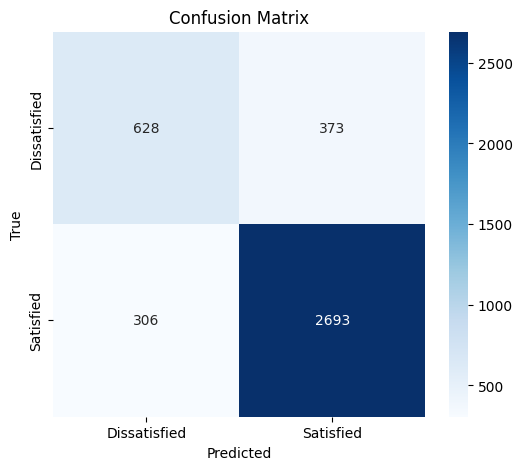

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Confusion Matrix and Classification Report

# Convert binary predictions and true labels into 'Satisfied' and 'Dissatisfied' labels
y_pred_labels = ['Satisfied' if pred == 1 else 'Dissatisfied' for pred in y_pred]
y_test_labels = ['Satisfied' if true == 1 else 'Dissatisfied' for true in y_test]

# Print confusion matrix and classification report
print(confusion_matrix(y_test_labels, y_pred_labels))  # Print confusion matrix
print(classification_report(y_test_labels, y_pred_labels))  # Print classification report

# Visualize the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)  # Generate confusion matrix

# Set up the plot
plt.figure(figsize=(6, 5))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Dissatisfied", "Satisfied"], yticklabels=["Dissatisfied", "Satisfied"])  # Plot heatmap

# Set plot titles and labels
plt.title("Confusion Matrix")  # Set title
plt.xlabel("Predicted")  # Set x-axis label
plt.ylabel("True")  # Set y-axis label

# Display the plot
plt.show()

#### Visualizing Classification Report

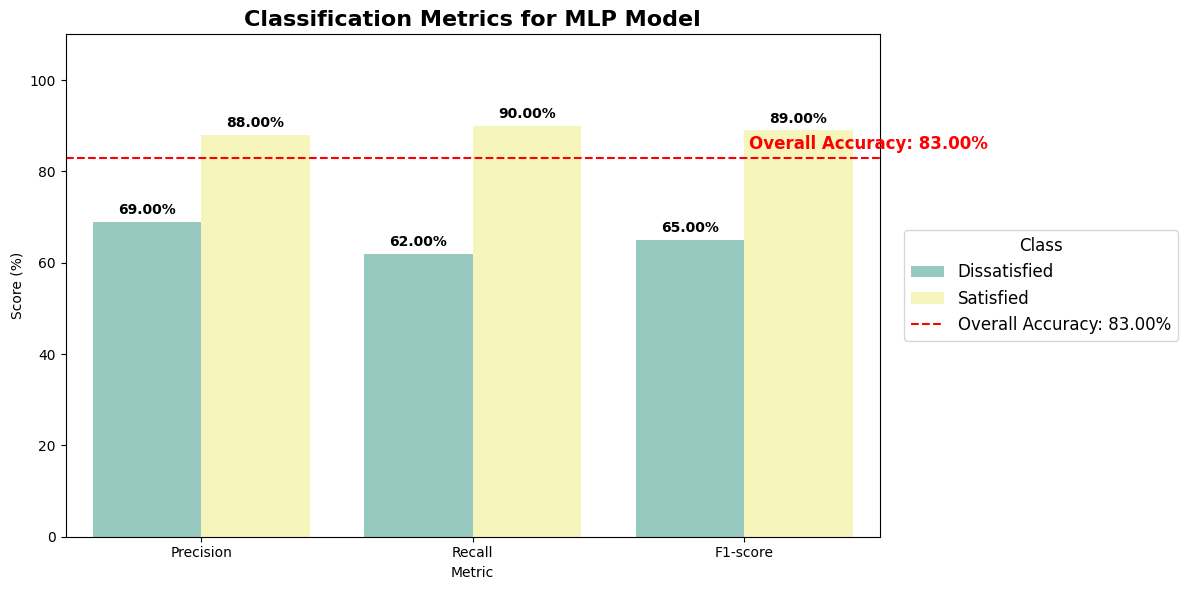

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 8: Plot Classification Metrics

# Given classification report data
metrics = {
    'Class': ['Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied'],
    'Metric': ['Precision', 'Recall', 'F1-score'] * 2,
    'Score': [0.69, 0.62, 0.65, 0.88, 0.90, 0.89]
}

# Overall accuracy
accuracy = 0.83
accuracy_percent = accuracy * 100
accuracy_label = f'Overall Accuracy: {accuracy_percent:.2f}%'

# Create DataFrame from metrics
class_metrics = pd.DataFrame(metrics)
class_metrics['Score'] = class_metrics['Score'] * 100  # Convert scores to percentage

# Plotting
plt.figure(figsize=(12, 6))

# Create a barplot
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')

# Add score labels above bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add accuracy line and label
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Final plot settings
plt.ylim(0, 110)
plt.title('Classification Metrics for MLP Model', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')

# Move legend outside
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, title_fontsize=12, frameon=True)

# Display the plot
plt.tight_layout()
plt.show()


#### Visualize Training and Testing Accuracy

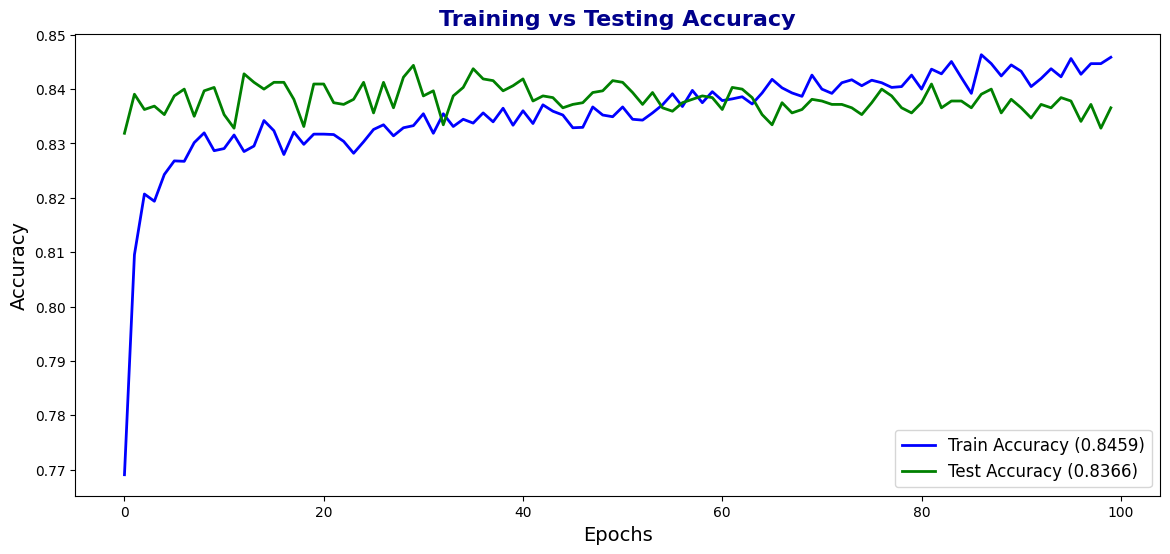

In [33]:
import matplotlib.pyplot as plt

# Step 8: Visualize Training and Testing Accuracy
# Visualize Training and Testing Accuracy over Epochs
plt.figure(figsize=(14, 6))

# Plot for Training Accuracy
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy value
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy value

# Plot training accuracy
plt.plot(history.history['accuracy'], label=f'Train Accuracy ({train_accuracy:.4f})', color='blue', linewidth=2)
# Plot testing accuracy
plt.plot(history.history['val_accuracy'], label=f'Test Accuracy ({val_accuracy:.4f})', color='green', linewidth=2)

# Title with formatting
plt.title('Training vs Testing Accuracy', fontsize=16, fontweight='bold', color='darkblue')

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add a legend with the values
plt.legend(loc='lower right', fontsize=12)

# Display the plot
plt.show()


#### Visualize the Training History for Accuracy and Loss

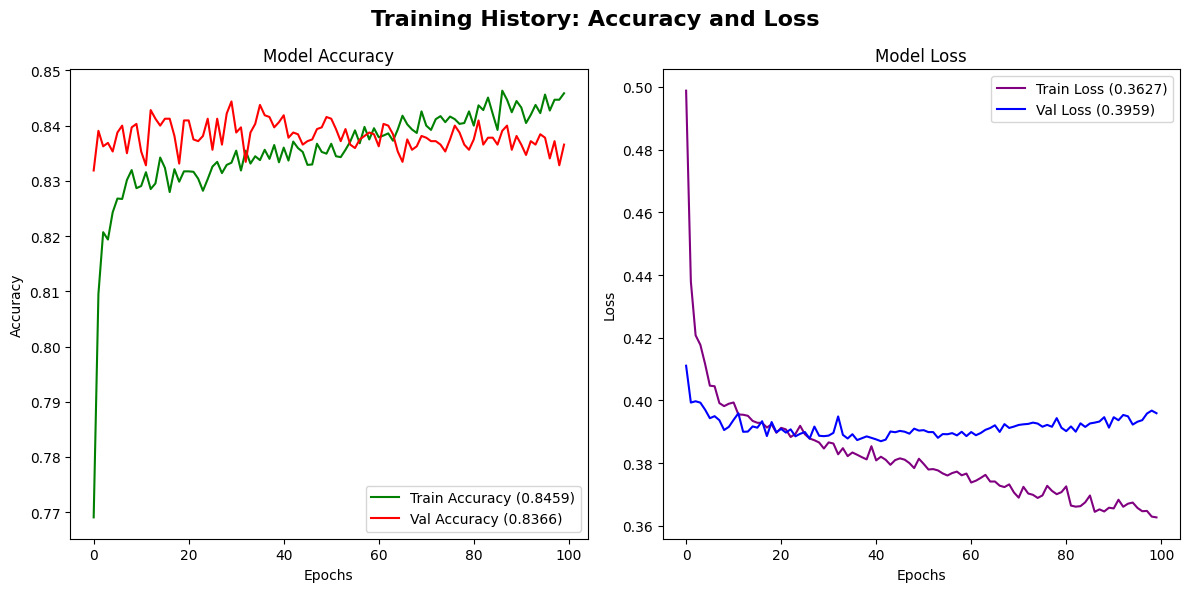

In [34]:
import matplotlib.pyplot as plt

# Visualize the training history for accuracy and loss

# Step 1: Plot Accuracy over Epochs
plt.figure(figsize=(12, 6))

# Subplot for Accuracy
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy value
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy value
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
plt.plot(history.history['accuracy'], label=f'Train Accuracy ({train_accuracy:.4f})', color='green')  # Using green for training accuracy
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({val_accuracy:.4f})', color='red')  # Using red for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Step 2: Plot Loss over Epochs
train_loss = history.history['loss'][-1]  # Last training loss value
val_loss = history.history['val_loss'][-1]  # Last validation loss value
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
plt.plot(history.history['loss'], label=f'Train Loss ({train_loss:.4f})', color='purple')  # Using purple for training loss
plt.plot(history.history['val_loss'], label=f'Val Loss ({val_loss:.4f})', color='blue')  # Using yellow for validation loss
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Common title for both subplots
plt.suptitle('Training History: Accuracy and Loss', fontsize=16, fontweight='bold')

# Layout adjustment for better spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


#### 2. TabNet

In [35]:
#Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Step 2: Load and Prepare the Data
# Load data: Read the CSV file into a Pandas DataFrame
data = pd.read_csv("scaled_dataset.csv")

# Features and target:
# X contains all the columns except the target variable "Satisfaction_Satisfied"
# y contains the target variable "Satisfaction_Satisfied"
X = data.drop("Satisfaction_Satisfied", axis=1).values  # Features (all columns except target)
y = data["Satisfaction_Satisfied"].values  # Target variable (customer satisfaction)

# Train-test split:
# Split the dataset into training and testing sets (80% training, 20% testing)
# Stratified split ensures that the proportion of each class in y is maintained in both the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # 20% test, 80% train, and stratify based on target labels
)

In [37]:
# Import necessary libraries
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import pandas as pd

# Safely convert to numpy arrays if still DataFrame/Series
# This function ensures that the input data (X or y) is converted to numpy arrays (if they are still pandas DataFrame/Series).
# It also allows specifying the dtype for the conversion, for example, np.float32 or np.int64.
def ensure_numpy(X, dtype=None):
    if isinstance(X, (pd.DataFrame, pd.Series)):
        return X.to_numpy(dtype=dtype)  # Convert DataFrame/Series to numpy array
    return X.astype(dtype) if dtype else X  # Return numpy array with specified dtype if needed

# Convert training and testing data to numpy arrays with appropriate data types
X_train_np = ensure_numpy(X_train, np.float32)  # Features for training (convert to float32)
X_test_np = ensure_numpy(X_test, np.float32)    # Features for testing (convert to float32)
y_train_np = ensure_numpy(y_train, np.int64).flatten()  # Target for training (convert to int64 and flatten)
y_test_np = ensure_numpy(y_test, np.int64).flatten()    # Target for testing (convert to int64 and flatten)

# Train TabNet model
# Instantiate the TabNetClassifier model, specifying 'auto' for device_name to use the available device (CPU/GPU).
tabnet_model = TabNetClassifier(device_name='auto')

# Fit the model using the training data (X_train_np, y_train_np) and evaluate on the test data (X_test_np, y_test_np).
tabnet_model.fit(
    X_train_np, y_train_np,  # Training data and labels
    eval_set=[(X_test_np, y_test_np)],  # Evaluation data and labels
    eval_name=["val"],  # Evaluation set name
    eval_metric=["accuracy"],  # Metric to monitor for evaluation (accuracy)
    max_epochs=100,  # Maximum number of epochs for training
    patience=10,  # Early stopping patience (number of epochs with no improvement)
    batch_size=1024,  # Batch size for training
    virtual_batch_size=128,  # Virtual batch size for training (for gradient accumulation)
    num_workers=0,  # Number of workers for data loading (use 0 for no parallelism)
    drop_last=False  # Don't drop the last batch if it's smaller than batch_size
)

epoch 0  | loss: 0.58633 | val_accuracy: 0.75025 |  0:00:01s
epoch 1  | loss: 0.46527 | val_accuracy: 0.79825 |  0:00:02s
epoch 2  | loss: 0.42847 | val_accuracy: 0.81    |  0:00:04s
epoch 3  | loss: 0.41606 | val_accuracy: 0.81225 |  0:00:05s
epoch 4  | loss: 0.41054 | val_accuracy: 0.81875 |  0:00:07s
epoch 5  | loss: 0.40668 | val_accuracy: 0.82225 |  0:00:08s
epoch 6  | loss: 0.40458 | val_accuracy: 0.82525 |  0:00:10s
epoch 7  | loss: 0.40167 | val_accuracy: 0.8305  |  0:00:11s
epoch 8  | loss: 0.398   | val_accuracy: 0.828   |  0:00:13s
epoch 9  | loss: 0.39707 | val_accuracy: 0.826   |  0:00:14s
epoch 10 | loss: 0.3962  | val_accuracy: 0.82675 |  0:00:16s
epoch 11 | loss: 0.39443 | val_accuracy: 0.83175 |  0:00:17s
epoch 12 | loss: 0.39508 | val_accuracy: 0.82875 |  0:00:18s
epoch 13 | loss: 0.39489 | val_accuracy: 0.831   |  0:00:20s
epoch 14 | loss: 0.39397 | val_accuracy: 0.83125 |  0:00:21s
epoch 15 | loss: 0.39315 | val_accuracy: 0.83125 |  0:00:22s
epoch 16 | loss: 0.39438


Classification Report:
               precision    recall  f1-score   support

Dissatisfied       0.68      0.64      0.66      1001
   Satisfied       0.88      0.90      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.83      0.83      0.83      4000



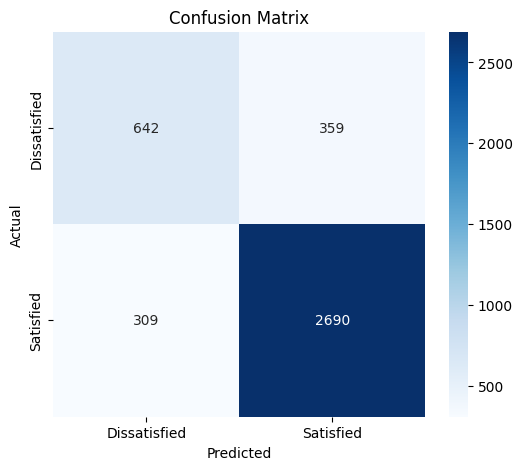

In [38]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix  # For generating classification report and confusion matrix
import seaborn as sns  # For creating heatmaps
import matplotlib.pyplot as plt  # For plotting the confusion matrix
import numpy as np

# Ensure X_test is a NumPy array of correct dtype
X_test_np = X_test.to_numpy(dtype=np.float32) if hasattr(X_test, "to_numpy") else X_test.astype(np.float32)

# Predict using the trained TabNet model
y_pred = tabnet_model.predict(X_test_np)

# If predictions are probabilities, convert to class labels (True/False)
if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1)  # For multiclass
else:
    y_pred = (y_pred > 0.5).astype("int32").flatten()  # For binary classification

# Convert boolean/int labels to strings
y_test_named = np.where(y_test, "Satisfied", "Dissatisfied")
y_pred_named = np.where(y_pred, "Satisfied", "Dissatisfied")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_named, y_pred_named))

# Confusion Matrix
cm = confusion_matrix(y_test_named, y_pred_named, labels=["Dissatisfied", "Satisfied"])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Dissatisfied", "Satisfied"],
            yticklabels=["Dissatisfied", "Satisfied"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Visualizing Classification Report

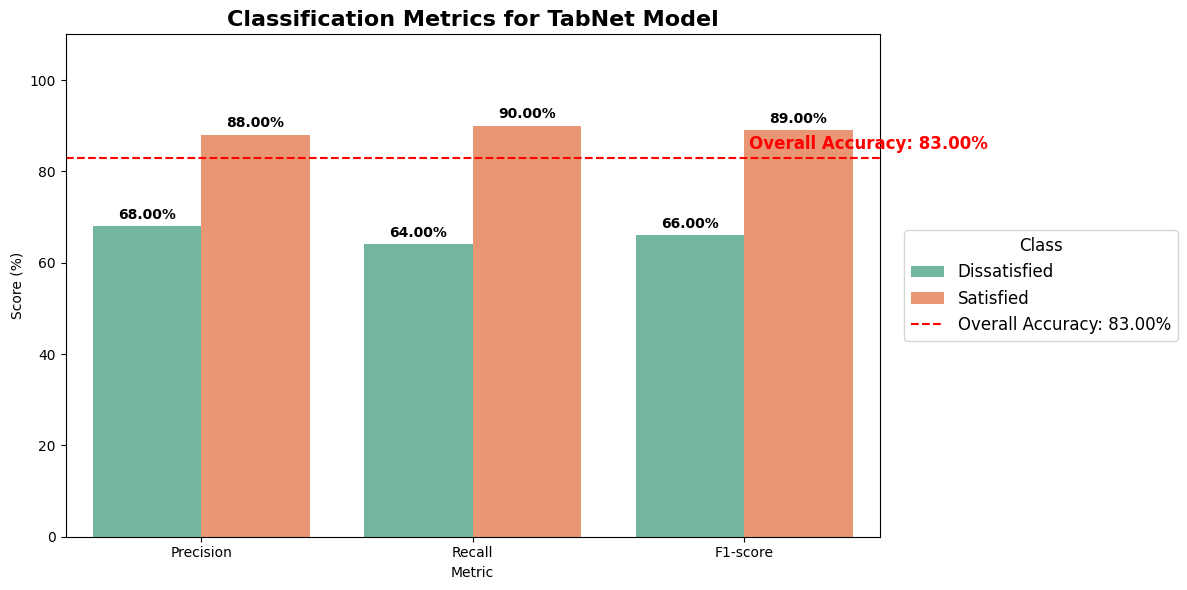

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 8: Plot Classification Metrics

# Updated classification report data from TabNet results
metrics = {
    'Class': ['Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied'],
    'Metric': ['Precision', 'Recall', 'F1-score'] * 2,
    'Score': [0.68, 0.64, 0.66, 0.88, 0.90, 0.89]
}

# Overall accuracy
accuracy = 0.83
accuracy_percent = accuracy * 100
accuracy_label = f'Overall Accuracy: {accuracy_percent:.2f}%'

# Create DataFrame
class_metrics = pd.DataFrame(metrics)
class_metrics['Score'] = class_metrics['Score'] * 100  # Convert scores to percentage

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set2')

# Add score labels
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add horizontal accuracy line
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Final touches
plt.ylim(0, 110)
plt.title('Classification Metrics for TabNet Model', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()


#### Step 5:Visualize Training History

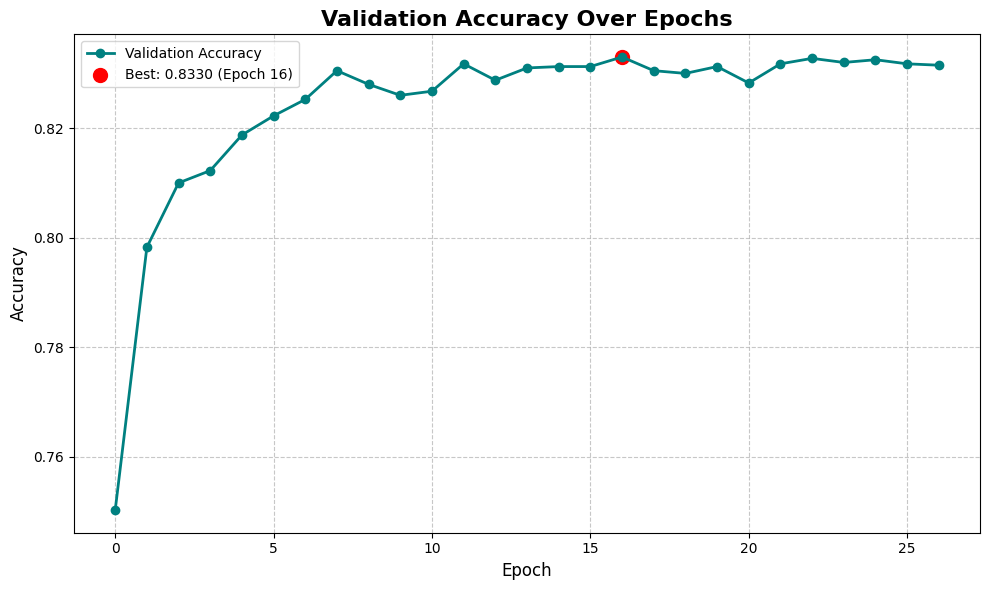

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

In [40]:
import matplotlib.pyplot as plt

# Extract accuracy history
val_accuracy = tabnet_model.history["val_accuracy"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(val_accuracy, marker='o', linestyle='-', color='teal', linewidth=2, label='Validation Accuracy')

# Highlight best accuracy
best_epoch = np.argmax(val_accuracy)
best_acc = val_accuracy[best_epoch]
plt.scatter(best_epoch, best_acc, color='red', s=100, label=f'Best: {best_acc:.4f} (Epoch {best_epoch})')

# Add labels, title and legend
plt.title("Validation Accuracy Over Epochs", fontsize=16, fontweight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
# Save the trained TabNet model
tabnet_model.save_model("tabnet_model")  # Save the model to a file

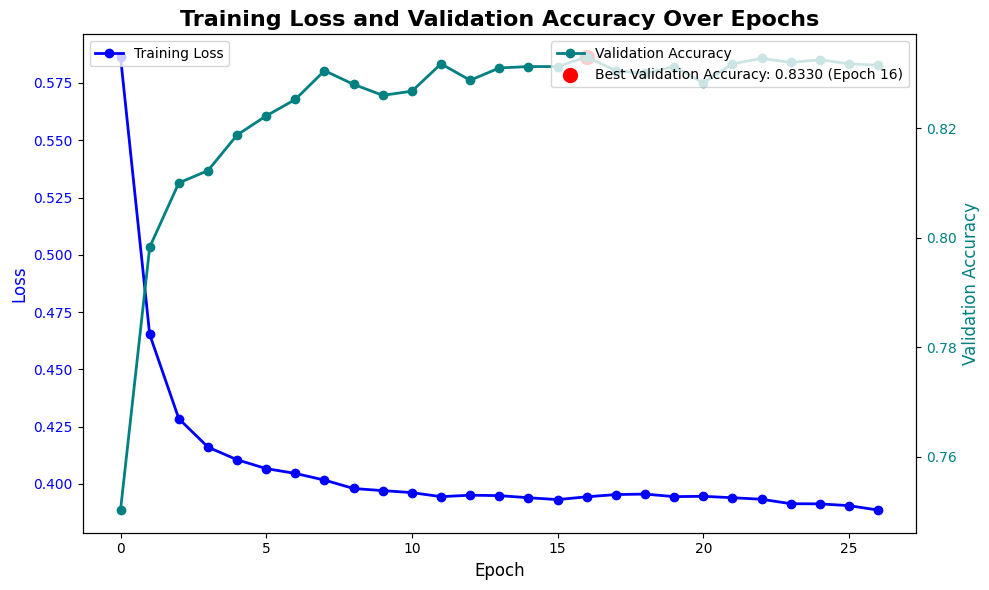

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract loss and validation accuracy history
train_loss = tabnet_model.history["loss"]  # Training loss
val_accuracy = tabnet_model.history["val_accuracy"]  # Validation accuracy (Testing accuracy)

# Step 2: Create the plot for loss and validation accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training loss (using the primary axis)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12, color='blue')
ax1.plot(train_loss, marker='o', linestyle='-', color='blue', linewidth=2, label='Training Loss')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis to plot validation accuracy
ax2 = ax1.twinx()  # Create a second y-axis
ax2.set_ylabel("Validation Accuracy", fontsize=12, color='teal')
ax2.plot(val_accuracy, marker='o', linestyle='-', color='teal', linewidth=2, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor='teal')

# Highlight best validation accuracy
best_epoch = np.argmax(val_accuracy)
best_acc = val_accuracy[best_epoch]
ax2.scatter(best_epoch, best_acc, color='red', s=100, label=f'Best Validation Accuracy: {best_acc:.4f} (Epoch {best_epoch})')

# Step 3: Add title and legend
plt.title("Training Loss and Validation Accuracy Over Epochs", fontsize=16, fontweight='bold')
fig.tight_layout()  # To ensure the layout is adjusted

# Show both legends for loss and accuracy
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Step 4: Show the plot
plt.show()


In [42]:
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Ensure data is numpy
def ensure_numpy(X, dtype=None):
    if isinstance(X, (pd.DataFrame, pd.Series)):
        return X.to_numpy(dtype=dtype)
    return X.astype(dtype) if dtype else X

# Convert data
X_train_np = ensure_numpy(X_train, np.float32)
X_test_np = ensure_numpy(X_test, np.float32)
y_train_np = ensure_numpy(y_train, np.int64).flatten()
y_test_np = ensure_numpy(y_test, np.int64).flatten()

# Objective function for Optuna
def objective(trial):
    params = {
        "n_d": trial.suggest_int("n_d", 8, 64),
        "n_a": trial.suggest_int("n_a", 8, 64),
        "n_steps": trial.suggest_int("n_steps", 3, 10),
        "gamma": trial.suggest_float("gamma", 1.0, 2.0),
        "lambda_sparse": trial.suggest_float("lambda_sparse", 1e-6, 1e-2, log=True),
        "optimizer_params": dict(lr=trial.suggest_float("lr", 1e-4, 0.1, log=True)),
        "mask_type": trial.suggest_categorical("mask_type", ["entmax", "sparsemax"]),
        "scheduler_params": {"step_size": 10, "gamma": 0.9},
        "scheduler_fn": torch.optim.lr_scheduler.StepLR,
        "verbose": 0,
        "seed": 42,
        "device_name": "auto"
    }

    model = TabNetClassifier(**params)

    model.fit(
        X_train_np, y_train_np,
        eval_set=[(X_test_np, y_test_np)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )

    preds = model.predict(X_test_np)
    acc = accuracy_score(y_test_np, preds)
    return acc

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, timeout=1800)  # 30 trials or 30 minutes

# Best parameters and accuracy
print("Best trial:")
trial = study.best_trial
print("  Accuracy: {:.4f}".format(trial.value))
print("  Best hyperparameters:", trial.params)


[I 2025-05-09 12:22:13,384] A new study created in memory with name: no-name-40dd0d8d-8991-4e04-be4b-fa0c9b6fb95a



Early stopping occurred at epoch 66 with best_epoch = 56 and best_val_accuracy = 0.83625


[I 2025-05-09 12:24:32,669] Trial 0 finished with value: 0.83625 and parameters: {'n_d': 22, 'n_a': 15, 'n_steps': 9, 'gamma': 1.1645962889667196, 'lambda_sparse': 4.960407975503339e-05, 'lr': 0.01946599991393541, 'mask_type': 'entmax'}. Best is trial 0 with value: 0.83625.



Early stopping occurred at epoch 92 with best_epoch = 82 and best_val_accuracy = 0.79425


[I 2025-05-09 12:26:58,590] Trial 1 finished with value: 0.79425 and parameters: {'n_d': 33, 'n_a': 53, 'n_steps': 5, 'gamma': 1.4535207087510917, 'lambda_sparse': 0.0041606006637799845, 'lr': 0.00024826141646115045, 'mask_type': 'sparsemax'}. Best is trial 0 with value: 0.83625.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_accuracy = 0.82425


[I 2025-05-09 12:27:59,110] Trial 2 finished with value: 0.82425 and parameters: {'n_d': 18, 'n_a': 61, 'n_steps': 8, 'gamma': 1.0961817152584747, 'lambda_sparse': 0.0004197414187590395, 'lr': 0.0034353110732287537, 'mask_type': 'entmax'}. Best is trial 0 with value: 0.83625.



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_accuracy = 0.77975


[I 2025-05-09 12:29:59,783] Trial 3 finished with value: 0.77975 and parameters: {'n_d': 49, 'n_a': 50, 'n_steps': 8, 'gamma': 1.3166199898462416, 'lambda_sparse': 0.004049362550799091, 'lr': 0.00018050770685778316, 'mask_type': 'sparsemax'}. Best is trial 0 with value: 0.83625.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_accuracy = 0.8365


[I 2025-05-09 12:31:30,336] Trial 4 finished with value: 0.8365 and parameters: {'n_d': 27, 'n_a': 19, 'n_steps': 10, 'gamma': 1.819546571564768, 'lambda_sparse': 0.007373575806094416, 'lr': 0.09984964123260844, 'mask_type': 'entmax'}. Best is trial 4 with value: 0.8365.



Early stopping occurred at epoch 61 with best_epoch = 51 and best_val_accuracy = 0.7945


[I 2025-05-09 12:33:21,133] Trial 5 finished with value: 0.7945 and parameters: {'n_d': 11, 'n_a': 37, 'n_steps': 8, 'gamma': 1.2405301638872177, 'lambda_sparse': 7.134052881021228e-06, 'lr': 0.00028995770315251704, 'mask_type': 'entmax'}. Best is trial 4 with value: 0.8365.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_accuracy = 0.78475


[I 2025-05-09 12:34:39,104] Trial 6 finished with value: 0.78475 and parameters: {'n_d': 35, 'n_a': 19, 'n_steps': 9, 'gamma': 1.3991372105096178, 'lambda_sparse': 4.839209817132445e-06, 'lr': 0.0007618173802528259, 'mask_type': 'sparsemax'}. Best is trial 4 with value: 0.8365.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_accuracy = 0.8305


[I 2025-05-09 12:35:20,515] Trial 7 finished with value: 0.8305 and parameters: {'n_d': 8, 'n_a': 45, 'n_steps': 5, 'gamma': 1.2955651021777768, 'lambda_sparse': 1.8384118565628105e-06, 'lr': 0.01466845058967145, 'mask_type': 'sparsemax'}. Best is trial 4 with value: 0.8365.



Early stopping occurred at epoch 45 with best_epoch = 35 and best_val_accuracy = 0.81075


[I 2025-05-09 12:37:27,252] Trial 8 finished with value: 0.81075 and parameters: {'n_d': 43, 'n_a': 44, 'n_steps': 10, 'gamma': 1.4926922465950525, 'lambda_sparse': 0.00030330554726685734, 'lr': 0.006823854885341367, 'mask_type': 'entmax'}. Best is trial 4 with value: 0.8365.



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_accuracy = 0.825


[I 2025-05-09 12:39:02,490] Trial 9 finished with value: 0.825 and parameters: {'n_d': 38, 'n_a': 35, 'n_steps': 7, 'gamma': 1.6645443733887244, 'lambda_sparse': 0.002236455306651245, 'lr': 0.004964822584174921, 'mask_type': 'entmax'}. Best is trial 4 with value: 0.8365.



Early stopping occurred at epoch 42 with best_epoch = 32 and best_val_accuracy = 0.84075


[I 2025-05-09 12:39:46,490] Trial 10 finished with value: 0.84075 and parameters: {'n_d': 59, 'n_a': 26, 'n_steps': 3, 'gamma': 1.9948410713859668, 'lambda_sparse': 3.815861266777448e-05, 'lr': 0.08163311388002503, 'mask_type': 'entmax'}. Best is trial 10 with value: 0.84075.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_accuracy = 0.83775


[I 2025-05-09 12:40:26,619] Trial 11 finished with value: 0.83775 and parameters: {'n_d': 62, 'n_a': 23, 'n_steps': 3, 'gamma': 1.992184887753239, 'lambda_sparse': 3.123657401921638e-05, 'lr': 0.09982180427322067, 'mask_type': 'entmax'}. Best is trial 10 with value: 0.84075.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_accuracy = 0.8385


[I 2025-05-09 12:41:02,077] Trial 12 finished with value: 0.8385 and parameters: {'n_d': 64, 'n_a': 28, 'n_steps': 3, 'gamma': 1.9817904246789702, 'lambda_sparse': 2.767143879895523e-05, 'lr': 0.09384681100690163, 'mask_type': 'entmax'}. Best is trial 10 with value: 0.84075.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_accuracy = 0.8365


[I 2025-05-09 12:41:26,005] Trial 13 finished with value: 0.8365 and parameters: {'n_d': 63, 'n_a': 29, 'n_steps': 3, 'gamma': 1.9595752743532802, 'lambda_sparse': 1.4635217734295391e-05, 'lr': 0.032108999346856945, 'mask_type': 'entmax'}. Best is trial 10 with value: 0.84075.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_accuracy = 0.83825


[I 2025-05-09 12:42:09,872] Trial 14 finished with value: 0.83825 and parameters: {'n_d': 53, 'n_a': 28, 'n_steps': 4, 'gamma': 1.6959407099434765, 'lambda_sparse': 0.0001594879142658982, 'lr': 0.04613902982197664, 'mask_type': 'entmax'}. Best is trial 10 with value: 0.84075.



Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_accuracy = 0.809


[I 2025-05-09 13:27:58,436] Trial 15 finished with value: 0.809 and parameters: {'n_d': 55, 'n_a': 10, 'n_steps': 5, 'gamma': 1.8252669495870673, 'lambda_sparse': 6.595981751232756e-05, 'lr': 0.0014708318535848156, 'mask_type': 'entmax'}. Best is trial 10 with value: 0.84075.


Best trial:
  Accuracy: 0.8407
  Best hyperparameters: {'n_d': 59, 'n_a': 26, 'n_steps': 3, 'gamma': 1.9948410713859668, 'lambda_sparse': 3.815861266777448e-05, 'lr': 0.08163311388002503, 'mask_type': 'entmax'}


#### 3. DCN Implementation Using Keras

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Load dataset
data = pd.read_csv('scaled_dataset.csv')


In [5]:
data.head()

,Age,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,Check-in Service,Boarding Service,Layover Service,Onboard Services,Baggage Service,...,Call Center Service,Departure Delay,Total Delay,Arrival Delay_log,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Leisure,Satisfaction_Satisfied
0,1.313639,0.707066,-0.725397,-0.707346,-1.415134,0.710901,-0.724658,1.419690,-0.713449,1.426085,...,-0.000036,-0.512062,-0.535057,0.000000,False,False,False,False,False,True
1,0.375815,1.410824,-1.432411,-0.000954,-0.000071,0.007665,-1.432021,0.007274,-0.004924,1.426085,...,-1.419386,0.655089,0.152076,1.386294,False,False,False,False,False,True
2,0.303675,0.003308,-1.432411,-1.413738,0.707461,0.710901,-0.017295,0.007274,-0.004924,1.426085,...,1.419315,-0.512062,-0.535057,0.000000,True,False,False,True,False,True
3,-0.057027,1.410824,-1.432411,-0.707346,1.414992,-1.398805,0.690068,-0.698934,-0.713449,0.718877,...,1.419315,-0.512062,-0.535057,0.000000,False,False,False,False,False,True
4,0.952937,1.410824,-0.018382,-1.413738,1.414992,-0.695570,0.690068,1.419690,-1.421974,-0.695539,...,-0.709711,-0.512062,-0.535057,0.000000,True,False,False,False,False,True


In [6]:
# Split into features and target
X = data.drop('Satisfaction_Satisfied', axis=1).values
y = data['Satisfaction_Satisfied'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv('scaled_dataset.csv')

# Separate features and label
X = data.drop('Satisfaction_Satisfied', axis=1).values
y = data['Satisfaction_Satisfied'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to correct types
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Define the Deep & Cross Network model
class DeepCrossNetwork(models.Model):
    def __init__(self, input_dim, deep_layers, cross_layers):
        super(DeepCrossNetwork, self).__init__()
        
        self.deep_layers = [layers.Dense(units, activation='relu') for units in deep_layers]
        self.cross_layers = [layers.Dense(1, activation='sigmoid') for _ in range(cross_layers)]
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = inputs
        for layer in self.deep_layers:
            x = layer(x)
        for cross_layer in self.cross_layers:
            x = cross_layer(x)
        return self.output_layer(x)

# Build and compile the model
dcn_model = DeepCrossNetwork(input_dim=X_train.shape[1], deep_layers=[128, 64], cross_layers=3)
dcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = dcn_model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test))

# Evaluate
test_loss, test_accuracy = dcn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict and generate classification report
y_pred_probs = dcn_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Ensure correct shape for y_test
y_test = y_test.flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2506 - loss: 0.7274 - val_accuracy: 0.2503 - val_loss: 0.7209
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2479 - loss: 0.7193 - val_accuracy: 0.2503 - val_loss: 0.7134
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2494 - loss: 0.7117 - val_accuracy: 0.2503 - val_loss: 0.7064
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2528 - loss: 0.7046 - val_accuracy: 0.2503 - val_loss: 0.6997
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2521 - loss: 0.6981 - val_accuracy: 0.2503 - val_loss: 0.6934
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6424 - loss: 0.6919 - val_accuracy: 0.7498 - val_loss: 0.6873
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7542 - loss: 0.6858 - val_accuracy: 0.7498 - val_loss: 0.6815
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7528 - loss: 0.6799 - val_accuracy: 0.7498 - 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


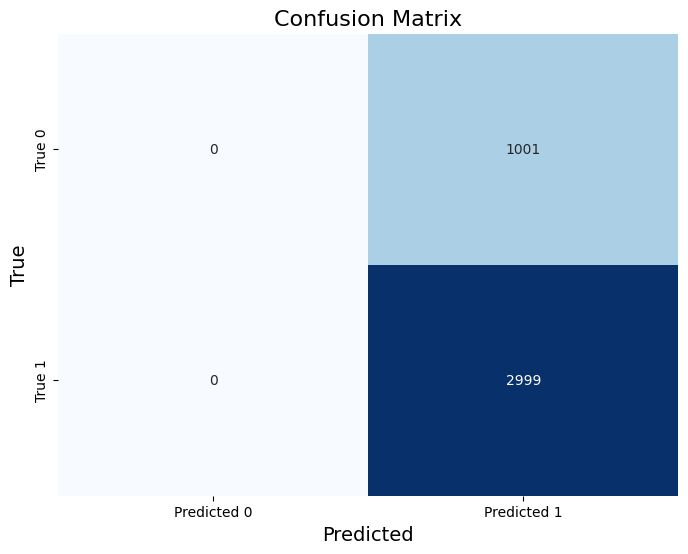

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Predict using the best model
y_pred = dcn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Step 2: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()


#### Classification Report

In [9]:
from sklearn.metrics import classification_report

# Step 6: Generate predictions
y_pred_probs = dcn_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Step 7: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'dcn_model' is not defined

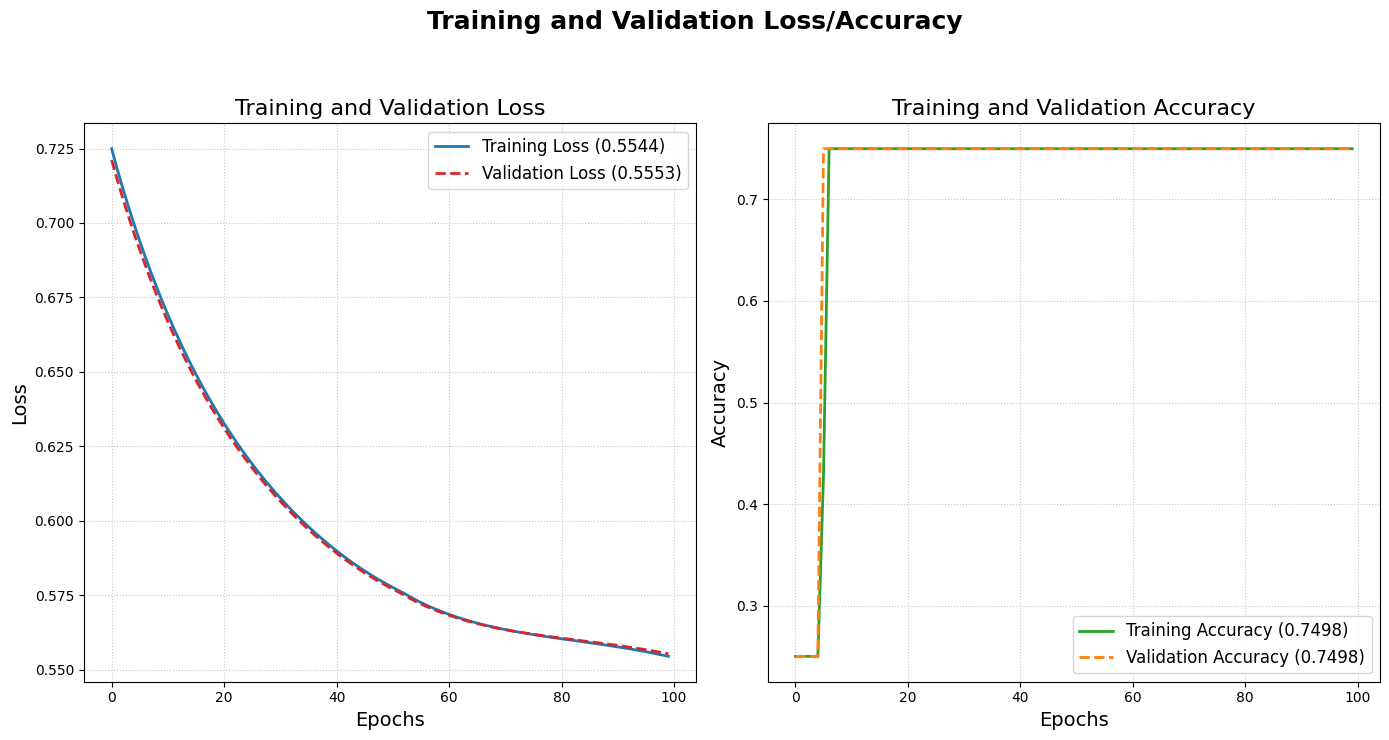

In [138]:
import matplotlib.pyplot as plt

# Step 6: Plot training and validation loss/accuracy
plt.figure(figsize=(14, 7))

# Adding a common title
plt.suptitle('Training and Validation Loss/Accuracy', fontsize=18, y=1.05, fontweight='bold')

# Plotting the loss
plt.subplot(1, 2, 1)
train_loss_line, = plt.plot(history.history['loss'], label=f'Training Loss ({history.history["loss"][-1]:.4f})', color='tab:blue', linewidth=2)
val_loss_line, = plt.plot(history.history['val_loss'], label=f'Validation Loss ({history.history["val_loss"][-1]:.4f})', color='tab:red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

# Plotting the accuracy
plt.subplot(1, 2, 2)
train_acc_line, = plt.plot(history.history['accuracy'], label=f'Training Accuracy ({history.history["accuracy"][-1]:.4f})', color='tab:green', linewidth=2)
val_acc_line, = plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({history.history["val_accuracy"][-1]:.4f})', color='tab:orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()
